<a href="https://colab.research.google.com/github/NeelParihar/colordetection/blob/master/colordetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image


In [0]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Datasets/color.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [0]:
train_dir = os.path.join('/content/', 'train')
validation_dir = os.path.join('/content/', 'test')

In [0]:
train_image_generator = ImageDataGenerator(
                    rescale=1./255,
                    ) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

batch_size = 25
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [15]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           color_mode="rgb",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           )

Found 2654 images belonging to 7 classes.


In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              color_mode="rgb",
                                                              )

Found 735 images belonging to 7 classes.


In [0]:
train_data_gen.image_shape

(150, 150, 3)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

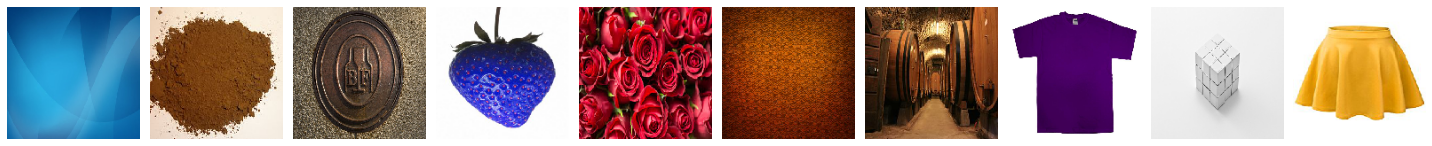

In [0]:
plotImages(sample_training_images[:10])

In [0]:

# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', 
#            input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     MaxPooling2D(),
    
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
    
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(7)
# ])

from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(150, 150,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [18]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2654 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps= 735 // batch_size
)


Epoch 1/50
 46/106 [============>.................] - ETA: 15s - loss: 2.0470 - accuracy: 0.2489

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


106/106 [==============================] - 29s 274ms/step - loss: 1.8519 - accuracy: 0.3332 - val_loss: 2.2187 - val_accuracy: 0.1517
Epoch 2/50
106/106 [==============================] - 28s 266ms/step - loss: 1.5485 - accuracy: 0.4526 - val_loss: 2.1702 - val_accuracy: 0.2056
Epoch 3/50
106/106 [==============================] - 28s 265ms/step - loss: 1.4603 - accuracy: 0.4930 - val_loss: 2.0363 - val_accuracy: 0.1915
Epoch 4/50
106/106 [==============================] - 28s 265ms/step - loss: 1.4398 - accuracy: 0.4933 - val_loss: 2.8624 - val_accuracy: 0.2169
Epoch 5/50
106/106 [==============================] - 28s 262ms/step - loss: 1.3885 - accuracy: 0.5184 - val_loss: 2.5710 - val_accuracy: 0.2141
Epoch 6/50
106/106 [==============================] - 28s 265ms/step - loss: 1.3352 - accuracy: 0.5242 - val_loss: 3.1929 - val_accuracy: 0.1986
Epoch 7/50
106/106 [==============================] - 28s 264ms/step - loss: 1.2456 - accuracy: 0.5595 - val_loss: 2.3444 - val_accuracy: 0.2

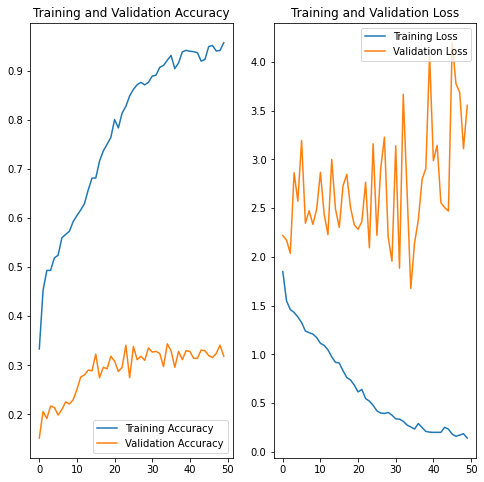

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()